In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
!pip install keras-tuner

     |████████████████████████████████| 61kB 4.4MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=be0762ab1b58f9a954f0f16c4a21981002ce9190a5c34d2edddbdee4483590a4
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=a92c7273012b76887964a6172d22e44ff71fb60dad88ddba1d39d0a75c8c9f21
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [4]:
print(tf.__version__)

2.2.0


In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(train_images,train_labels),(test_images,test_lables)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
print(train_labels[0])

9


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

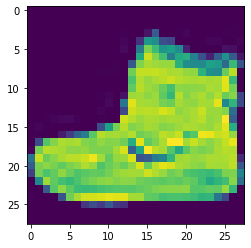

In [8]:
print(train_images[0])
plt.imshow(train_images[0])
print(train_labels[0])
print('\n',train_images[0].shape,'\n')

Scaling down images between 0 to 1

In [9]:
train_images=train_images/255.0
test_images=test_images/255.0

In [10]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [11]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [12]:
def build_model(hp):
  model = keras.Sequential([
      keras.layers.Conv2D(
      filters=hp.Int('conv_1_filter', min_value=32,max_value=128, step=16),
      kernel_size=hp.Choice('conv_1_kernal', values = [3,5]),
      activation='relu',
      input_shape=(28,28,1)
      ),
      keras.layers.Conv2D(
      filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
      kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
      activation='relu'
      ),
      keras.layers.Flatten(),
      keras.layers.Dense(
          units=hp.Int('Dense_1_units', min_value=32, max_value=128, step=16),
          activation='relu'
      ),
      keras.layers.Dense(10,activation='softmax')
  ])


  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2,1e-3])),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [13]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [14]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [15]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',
                          project_name="Mnist Fasshion")

In [16]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.5301 - accuracy: 0.8275 - val_loss: 0.4060 - val_accuracy: 0.8533
Epoch 2/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3738 - accuracy: 0.8645 - val_loss: 0.3814 - val_accuracy: 0.8643
Epoch 3/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3451 - accuracy: 0.8754 - val_loss: 0.3492 - val_accuracy: 0.8687


Epoch 1/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.5163 - accuracy: 0.8198 - val_loss: 0.4193 - val_accuracy: 0.8427
Epoch 2/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3951 - accuracy: 0.8556 - val_loss: 0.3875 - val_accuracy: 0.8553
Epoch 3/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3726 - accuracy: 0.8625 - val_loss: 0.4082 - val_accuracy: 0.8492


Epoch 1/3
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4125 - accuracy: 0.8539 - val_loss: 0.3113 - val_accuracy: 0.8872
Epoch 2/3
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2613 - accuracy: 0.9039 - val_loss: 0.2730 - val_accuracy: 0.9000
Epoch 3/3
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2036 - accuracy: 0.9241 - val_loss: 0.2572 - val_accuracy: 0.9048


Epoch 1/3
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4099 - accuracy: 0.8506 - val_loss: 0.3124 - val_accuracy: 0.8845
Epoch 2/3
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2689 - accuracy: 0.9013 - val_loss: 0.3034 - val_accuracy: 0.8842
Epoch 3/3
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2167 - accuracy: 0.9204 - val_loss: 0.2471 - val_accuracy: 0.9095


Epoch 1/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5472 - accuracy: 0.7985 - val_loss: 0.3941 - val_accuracy: 0.8487
Epoch 2/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4148 - accuracy: 0.8492 - val_loss: 0.4244 - val_accuracy: 0.8437
Epoch 3/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3885 - accuracy: 0.8571 - val_loss: 0.4144 - val_accuracy: 0.8510


INFO:tensorflow:Oracle triggered exit


In [17]:
model=tuner_search.get_best_models(num_models=1)[0]

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 112)       2912      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 64)        179264    
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0         
_________________________________________________________________
dense (Dense)                (None, 80)                2048080   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                810       
Total params: 2,231,066
Trainable params: 2,231,066
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1751 - accuracy: 0.9336 - val_loss: 0.2618 - val_accuracy: 0.9078
Epoch 5/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.1378 - accuracy: 0.9486 - val_loss: 0.2867 - val_accuracy: 0.9027
Epoch 6/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.1078 - accuracy: 0.9597 - val_loss: 0.2732 - val_accuracy: 0.9145
Epoch 7/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0820 - accuracy: 0.9688 - val_loss: 0.3487 - val_accuracy: 0.9068
Epoch 8/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0691 - accuracy: 0.9734 - val_loss: 0.3885 - val_accuracy: 0.9093
Epoch 9/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0534 - accuracy: 0.9796 - val_loss: 0.3965 - val_accuracy: 0.9087
Epoch 10/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0423 - accuracy: 0.9844 - val_loss: 0.4552 - val_accu

In [27]:
# model.fit(test_images,test_lables)
!pip install jovian

     |████████████████████████████████| 102kB 6.3MB/s 
  Created wheel for uuid: filename=uuid-1.30-cp36-none-any.whl size=6502 sha256=7b044f1bdce3f1600b2d6fe4d450fae4061cd09c06ec5383c56a820660afa13f
  Stored in directory: /root/.cache/pip/wheels/2a/80/9b/015026567c29fdffe31d91edbe7ba1b17728db79194fca1f21
Successfully built uuid


In [28]:
import jovian

In [30]:
jovian.commit()

[jovian] Error: Failed to detect Jupyter notebook or Python script. Skipping..
